In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving oasis_longitudinal.csv to oasis_longitudinal (4).csv


In [3]:
df = pd.read_csv('oasis_longitudinal.csv')
df.head(3)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046


In [4]:
df.shape

(373, 15)

In [5]:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [6]:
df.describe

<bound method NDFrame.describe of     Subject ID         MRI ID        Group  Visit  ...  CDR  eTIV   nWBV    ASF
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1  ...  0.0  1987  0.696  0.883
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2  ...  0.0  2004  0.681  0.876
2    OAS2_0002  OAS2_0002_MR1     Demented      1  ...  0.5  1678  0.736  1.046
3    OAS2_0002  OAS2_0002_MR2     Demented      2  ...  0.5  1738  0.713  1.010
4    OAS2_0002  OAS2_0002_MR3     Demented      3  ...  0.5  1698  0.701  1.034
..         ...            ...          ...    ...  ...  ...   ...    ...    ...
368  OAS2_0185  OAS2_0185_MR2     Demented      2  ...  0.5  1693  0.694  1.037
369  OAS2_0185  OAS2_0185_MR3     Demented      3  ...  0.5  1688  0.675  1.040
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1  ...  0.0  1319  0.801  1.331
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2  ...  0.0  1327  0.796  1.323
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3  ...  0.0  1333  0.801  1.317

[373 

In [7]:
df.info

<bound method DataFrame.info of     Subject ID         MRI ID        Group  Visit  ...  CDR  eTIV   nWBV    ASF
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1  ...  0.0  1987  0.696  0.883
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2  ...  0.0  2004  0.681  0.876
2    OAS2_0002  OAS2_0002_MR1     Demented      1  ...  0.5  1678  0.736  1.046
3    OAS2_0002  OAS2_0002_MR2     Demented      2  ...  0.5  1738  0.713  1.010
4    OAS2_0002  OAS2_0002_MR3     Demented      3  ...  0.5  1698  0.701  1.034
..         ...            ...          ...    ...  ...  ...   ...    ...    ...
368  OAS2_0185  OAS2_0185_MR2     Demented      2  ...  0.5  1693  0.694  1.037
369  OAS2_0185  OAS2_0185_MR3     Demented      3  ...  0.5  1688  0.675  1.040
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1  ...  0.0  1319  0.801  1.331
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2  ...  0.0  1327  0.796  1.323
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3  ...  0.0  1333  0.801  1.317

[373 ro

In [8]:
df1 = df.loc[df['Visit']==1]

In [9]:
df1 = df1.reset_index(drop=True)

In [10]:
df1.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lab = LabelEncoder()

In [13]:
df1['M/F']=lab.fit_transform(df1['M/F'])
df1['Hand']=lab.fit_transform(df1['Hand'])
df1['Group']=lab.fit_transform(df1['Group'])

In [14]:
df1.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,2,1,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,OAS2_0002_MR1,1,1,0,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,OAS2_0004_MR1,2,1,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,OAS2_0005_MR1,2,1,0,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,OAS2_0007_MR1,1,1,0,1,0,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [15]:
df2 = df1.drop(df1[['Subject ID', 'MRI ID','Visit']],axis=1)
df2.head()

,Group,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,0,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,2,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,2,0,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,1,0,1,0,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [16]:
df2.isnull().sum()

Group       0
MR Delay    0
M/F         0
Hand        0
Age         0
EDUC        0
SES         8
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

In [17]:
df3 = df2.dropna()
df3.isnull().sum()

Group       0
MR Delay    0
M/F         0
Hand        0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

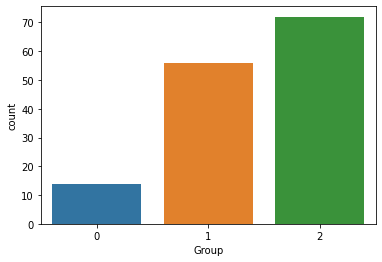

In [18]:
sns.countplot(x='Group',data=df3)

In [19]:
def bar_chart(feature):
    Demented = df1[df1['Group']==1][feature].value_counts()
    Nondemented = df1[df1['Group']==1][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar', stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Gender and demented rate')

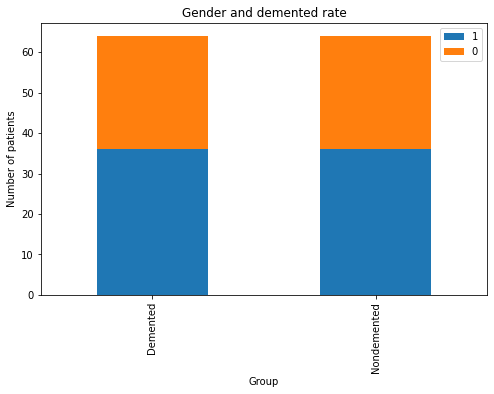

In [20]:
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and demented rate')

(15.3, 30.0)

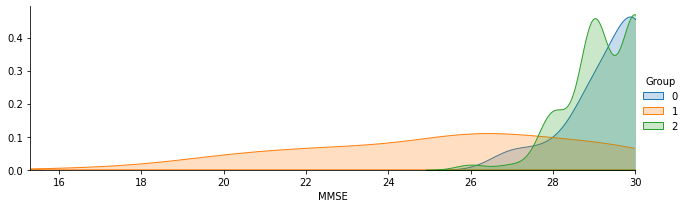

In [21]:
facet = sns.FacetGrid(df1, hue='Group',aspect=3)
facet.map(sns.kdeplot,'MMSE',shade='True')
facet.set(xlim=(0,df1['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

(0.5, 2.0)

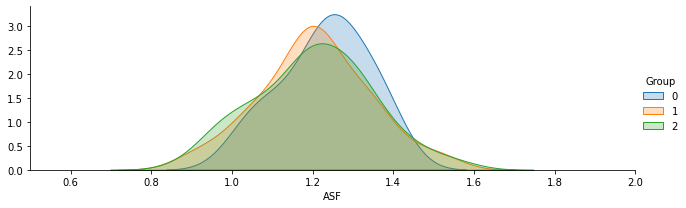

In [22]:
facet = sns.FacetGrid(df1, hue='Group',aspect=3)
facet.map(sns.kdeplot,'ASF',shade='True')
facet.set(xlim=(0,df1['ASF'].max()))
facet.add_legend()
plt.xlim(0.5,2)

(0.6, 0.9)

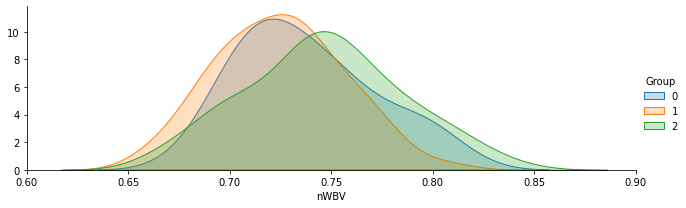

In [23]:
facet = sns.FacetGrid(df1, hue='Group',aspect=3)
facet.map(sns.kdeplot,'nWBV',shade='True')
facet.set(xlim=(0,df1['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

(900.0, 2100.0)

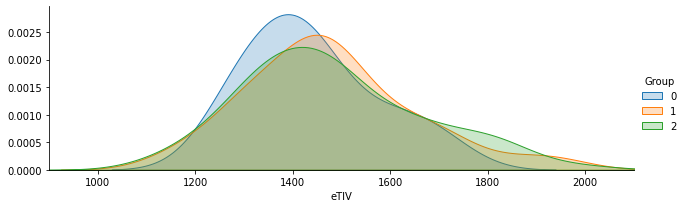

In [24]:
facet = sns.FacetGrid(df1, hue='Group',aspect=3)
facet.map(sns.kdeplot,'eTIV',shade='True')
facet.set(xlim=(0,df1['eTIV'].max()))
facet.add_legend()
plt.xlim(900,2100)

(0.0, 0.16)

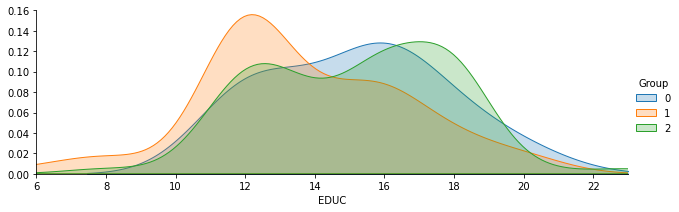

In [25]:
facet = sns.FacetGrid(df1, hue='Group',aspect=3)
facet.map(sns.kdeplot,'EDUC',shade=True)
facet.set(xlim=(df1['EDUC'].min(),df1['EDUC'].max()))
facet.add_legend()
plt.ylim(0.0, 0.16)

In [26]:
x = df3.iloc[:,df3.columns!='Group']
y = df3.iloc[:,df3.columns=='Group']

In [27]:
x.shape

(142, 11)

In [28]:
x.head

<bound method NDFrame.head of      MR Delay  M/F  Hand  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0           0    1     0   87    14  2.0  27.0  0.0  1987  0.696  0.883
2           0    0     0   88    18  3.0  28.0  0.0  1215  0.710  1.444
3           0    1     0   80    12  4.0  28.0  0.0  1689  0.712  1.039
5           0    0     0   93    14  2.0  30.0  0.0  1272  0.698  1.380
6           0    1     0   68    12  2.0  27.0  0.5  1457  0.806  1.205
..        ...  ...   ...  ...   ...  ...   ...  ...   ...    ...    ...
143         0    1     0   79    20  1.0  26.0  0.5  1548  0.711  1.134
146         0    0     0   66    13  2.0  30.0  0.0  1495  0.746  1.174
147         0    0     0   72    16  3.0  24.0  0.5  1354  0.733  1.296
148         0    1     0   80    16  1.0  28.0  0.5  1704  0.711  1.030
149         0    0     0   61    13  2.0  30.0  0.0  1319  0.801  1.331

[142 rows x 11 columns]>

In [29]:
y.head

<bound method NDFrame.head of      Group
0        2
2        2
3        2
5        2
6        1
..     ...
143      1
146      2
147      1
148      1
149      2

[142 rows x 1 columns]>

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_curve, auc

In [31]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.3)

In [32]:
xtrain.head()

,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
109,0,0,0,70,11,4.0,29.0,0.5,1295,0.748,1.355
108,0,0,0,78,12,3.0,29.0,0.0,1475,0.731,1.190
0,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
56,0,0,0,88,12,3.0,30.0,0.0,1428,0.700,1.229
7,0,0,0,66,12,3.0,30.0,0.5,1447,0.769,1.213


In [33]:
ytrain.head()

,Group
109,1
108,0
0,2
56,2
7,1


In [34]:
from sklearn.svm import SVC

In [35]:
model1 = SVC()

In [36]:
model1.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
predic1 = model1.predict(xtest)

In [38]:
acc1 = accuracy_score(predic1,ytest)
acc1

0.4186046511627907

In [39]:
from sklearn.metrics import classification_report

In [40]:
def apply_classifier(model1,xtrain,xtest,ytrain,ytest):
    model1.fit(xtrain,ytrain)
    predictions = model1.predict(xtest)
    print("\n Classification report: \n{}".format(classification_report(ytest,predictions)))

In [41]:
apply_classifier(model1,xtrain,xtest,ytrain,ytest)


 Classification report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        21
           2       0.42      1.00      0.59        18

    accuracy                           0.42        43
   macro avg       0.14      0.33      0.20        43
weighted avg       0.18      0.42      0.25        43



In [42]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
apply_classifier(random_forest,xtrain,xtest,ytrain,ytest)


 Classification report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00        21
           2       0.82      1.00      0.90        18

    accuracy                           0.91        43
   macro avg       0.61      0.67      0.63        43
weighted avg       0.83      0.91      0.87        43



In [43]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
apply_classifier(decision_tree,xtrain,xtest,ytrain,ytest)


 Classification report: 
              precision    recall  f1-score   support

           0       0.14      0.25      0.18         4
           1       1.00      1.00      1.00        21
           2       0.80      0.67      0.73        18

    accuracy                           0.79        43
   macro avg       0.65      0.64      0.64        43
weighted avg       0.84      0.79      0.81        43



In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [45]:
model = Sequential([
                    Dense(units=32,input_dim = 11,activation='relu'),
                    Dense(units=48,activation='relu'),
                    Dropout(0.5),
                    Dense(20,activation='relu'),
                    Dense(24,activation='relu'),
                    Dense(1,activation='sigmoid')
])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 48)                1584      
_________________________________________________________________
dropout (Dropout)            (None, 48)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                980       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 3,477
Trainable params: 3,477
Non-trainable params: 0
______________________________________________________

In [47]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,batch_size=11,epochs=5)

Epoch 1/5
9/9 [==============================] - 1s 2ms/step - loss: 131.7919 - accuracy: 0.1187
Epoch 2/5
9/9 [==============================] - 0s 2ms/step - loss: 20.3949 - accuracy: 0.2129
Epoch 3/5
9/9 [==============================] - 0s 2ms/step - loss: -9.6849 - accuracy: 0.2639
Epoch 4/5
9/9 [==============================] - 0s 2ms/step - loss: -20.7397 - accuracy: 0.3660
Epoch 5/5
9/9 [==============================] - 0s 2ms/step - loss: -55.9489 - accuracy: 0.3634


In [48]:
score = model.evaluate(xtest,ytest)
print(score)

nn_result = score[1]
print('ANN result: ',nn_result)

2/2 [==============================] - 0s 6ms/step - loss: -47.4020 - accuracy: 0.4884
[-47.402042388916016, 0.4883720874786377]
ANN result:  0.4883720874786377
